## Report


##### Import the libraries
+ import numpy as np 
+ import pandas as pd
+ import matplotlib.pyplot as plt
+ import seaborn as sns
+ import tensorflow
+ from tensorflow import keras
+ from keras.models import  Sequential
+ from keras.layers import Dense, Dropout
+ from sklearn.preprocessing import StandardScaler
+ from sklearn.metrics import accuracy_score
+ from mlxtend.plotting import plot_decision_regions


#### Loading the dataset
+ Check the dataset
+ Check the info of data


#### Check the  spead of datapoint using vizualization

#### Performing train test split and Building MLP
+ Identify the Input and Output
+ Segregate the data into train and test part
+ perform preprocessing step
+ perform fit transform on train data and transform on test data


#### Important Steps in MLP
##### Create the Architecture using Sequencial
+ Crete the model 
+ specify the no of nurons and activation function like relu, sigmoid and tanh
+ Specify the kernel_initializer = random_uniform, he_uniform, he_normal, Xavier, Glorot  
+ Specify the input dimension

##### Model Compilation 
+ Specify the Optimizer like gd, sgd, mini batch sgd
+ loss function:
  + For Regression: MSE, MAE, Huber loss
  + For Classification: Binary cross entropy, Categorical cross entropy
+ Specify Metrics as accuracy

##### Training the model
+ fit the X_train_trans and y_train in the model means leaning the patterns, relationship between input and output
+ Specify the batch size
+ specify the epochs and validation_split

##### MLP Evaluation and Plotting decision surfaces
+ check the prediction of X_test_trans
+ check the accuracy score
+ Try to compair the loss and val_loss using vizualization so can understand the underfitting and overfitting
+ plot the decision surface of X_train_trans, y_train
+ plot the decision surface of X_test_trans, y_test

Importing Requisite Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format='retina' 

In [2]:
import tensorflow
from tensorflow import keras
from keras.models import  Sequential
from keras.layers import Dense, Dropout 

Loading the dataset

In [3]:
df = pd.read_csv(r"E:\Excel_files\Deep Learning\demo_data\9.random.csv", header = None)

In [4]:
df.head()

,0,1,2
0,0.374,1.080,0.0
1,0.445,1.140,1.0
2,0.514,1.130,0.0
3,0.466,1.240,1.0
4,0.371,0.968,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       400 non-null    float64
 1   1       400 non-null    float64
 2   2       400 non-null    float64
dtypes: float64(3)
memory usage: 9.5 KB


Plotting the datapoints to identify shape

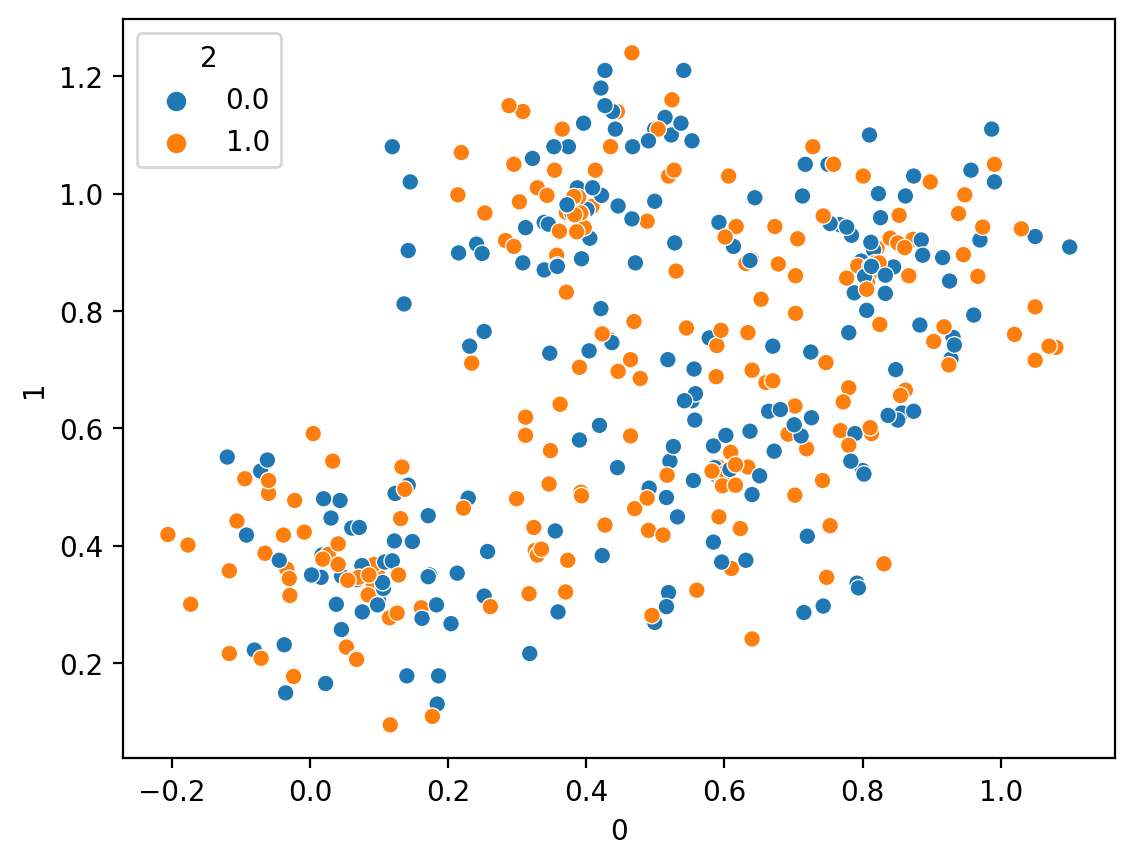

In [6]:
sns.scatterplot(x = 0,y=1, hue = 2, data = df);

Performing train test split and Building MLP

In [7]:
X = df[[0,1]]
y = df[2]

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_trans=sc.fit_transform(X_train) 

In [10]:
X_test_trans = sc.transform(X_test)  

In [11]:
model = Sequential()
model.add(Dense(12, activation='relu',kernel_initializer ='he_uniform', input_dim = 2))
# model.add(Dropout(0.2))
model.add(Dense(10, activation='relu',kernel_initializer ='he_uniform'))
# model.add(Dropout(0.2))
model.add(Dense(8, activation='relu', kernel_initializer ='he_uniform'))
# model.add(Dropout(0.2))
model.add(Dense(6, activation='relu', kernel_initializer ='he_uniform'))
# model.add(Dropout(0.2))
model.add(Dense(4, activation='relu', kernel_initializer ='he_uniform'))
# model.add(Dropout(0.2))
model.add(Dense(3,activation='relu', kernel_initializer = 'he_uniform'))
# model.add(Dropout(0.2))
model.add(Dense(2, activation='relu', kernel_initializer ='he_uniform'))
# model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid')) 

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                36        
                                                                 
 dense_1 (Dense)             (None, 10)                130       
                                                                 
 dense_2 (Dense)             (None, 8)                 88        
                                                                 
 dense_3 (Dense)             (None, 6)                 54        
                                                                 
 dense_4 (Dense)             (None, 4)                 28        
                                                                 
 dense_5 (Dense)             (None, 3)                 15        
                                                                 
 dense_6 (Dense)             (None, 2)                 8

Model Compilation and Training

In [13]:
model.compile(optimizer='Adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [14]:
history = model.fit(X_train_trans,y_train, batch_size =10, epochs = 80 ,validation_split = 0.2)

Epoch 1/80
26/26 [==============================] - 5s 33ms/step - loss: 0.6946 - accuracy: 0.4688 - val_loss: 0.6940 - val_accuracy: 0.5156
Epoch 2/80
26/26 [==============================] - 0s 10ms/step - loss: 0.6941 - accuracy: 0.4961 - val_loss: 0.6940 - val_accuracy: 0.5312
Epoch 3/80
26/26 [==============================] - 0s 10ms/step - loss: 0.6938 - accuracy: 0.4844 - val_loss: 0.6941 - val_accuracy: 0.5469
Epoch 4/80
26/26 [==============================] - 0s 9ms/step - loss: 0.6936 - accuracy: 0.4805 - val_loss: 0.6939 - val_accuracy: 0.5781
Epoch 5/80
26/26 [==============================] - 0s 11ms/step - loss: 0.6934 - accuracy: 0.5039 - val_loss: 0.6940 - val_accuracy: 0.4844
Epoch 6/80
26/26 [==============================] - 0s 12ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6938 - val_accuracy: 0.5156
Epoch 7/80
26/26 [==============================] - 0s 9ms/step - loss: 0.6932 - accuracy: 0.5078 - val_loss: 0.6928 - val_accuracy: 0.5312
Epoch 8/80
26/2

Epoch 59/80
26/26 [==============================] - 0s 12ms/step - loss: 0.6819 - accuracy: 0.5547 - val_loss: 0.6711 - val_accuracy: 0.5781
Epoch 60/80
26/26 [==============================] - 0s 10ms/step - loss: 0.6796 - accuracy: 0.5508 - val_loss: 0.6705 - val_accuracy: 0.5938
Epoch 61/80
26/26 [==============================] - 0s 9ms/step - loss: 0.6797 - accuracy: 0.5508 - val_loss: 0.6747 - val_accuracy: 0.5625
Epoch 62/80
26/26 [==============================] - 0s 12ms/step - loss: 0.6793 - accuracy: 0.5469 - val_loss: 0.6742 - val_accuracy: 0.5312
Epoch 63/80
26/26 [==============================] - 0s 9ms/step - loss: 0.6787 - accuracy: 0.5625 - val_loss: 0.6686 - val_accuracy: 0.5938
Epoch 64/80
26/26 [==============================] - 0s 10ms/step - loss: 0.6793 - accuracy: 0.5586 - val_loss: 0.6789 - val_accuracy: 0.5312
Epoch 65/80
26/26 [==============================] - 0s 9ms/step - loss: 0.6796 - accuracy: 0.5508 - val_loss: 0.6735 - val_accuracy: 0.5312
Epoch 66/

MLP Evaluation and Plotting decision surfaces

In [20]:
X_cap = model.predict(X_train_trans) 

10/10 [==============================] - 0s 7ms/step


In [21]:
X_cap_f = np.where(X_cap>0.5,1,0) 

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,X_cap_f) 

0.56875

In [15]:
Y_cap = model.predict(X_test_trans) 

3/3 [==============================] - 0s 7ms/step


In [16]:
Y_cap_f = np.where(Y_cap>0.5,1,0)  

In [17]:
# Y_cap_f

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,Y_cap_f)  

0.575

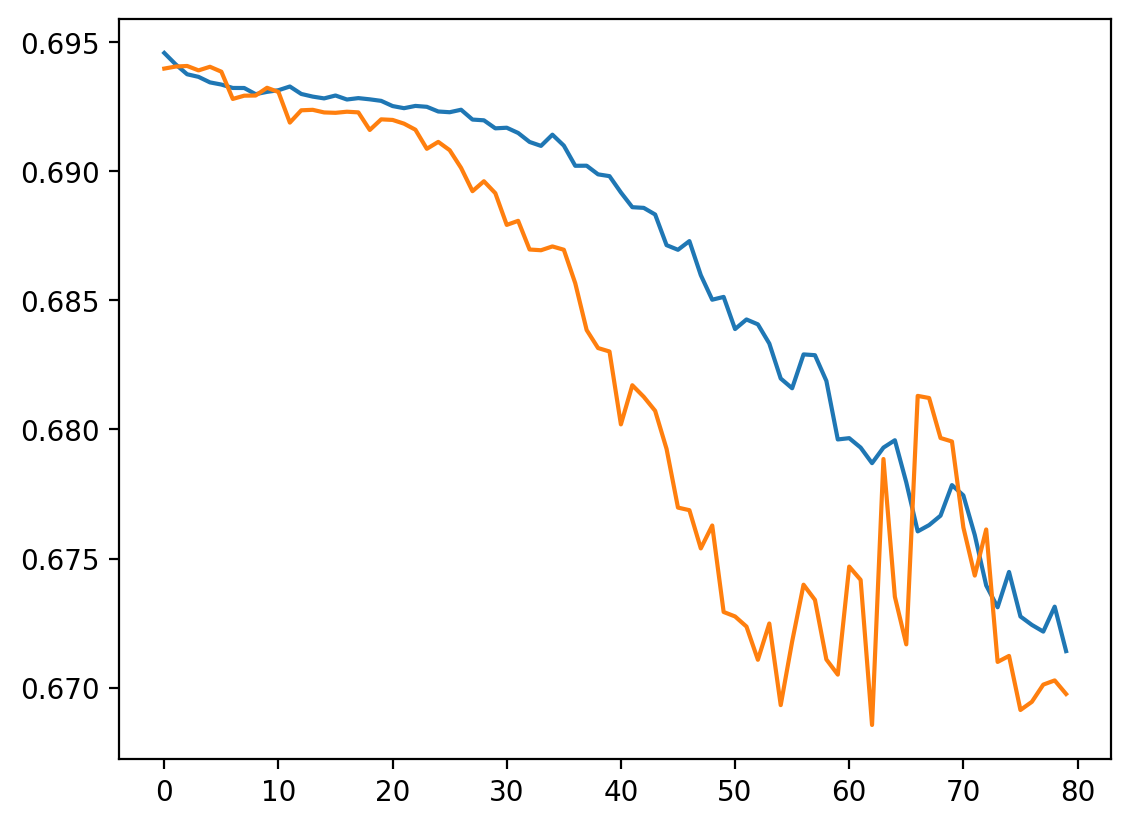

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']);

In [73]:
# !pip install mlxtend --upgrade

In [24]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 36s 4ms/step


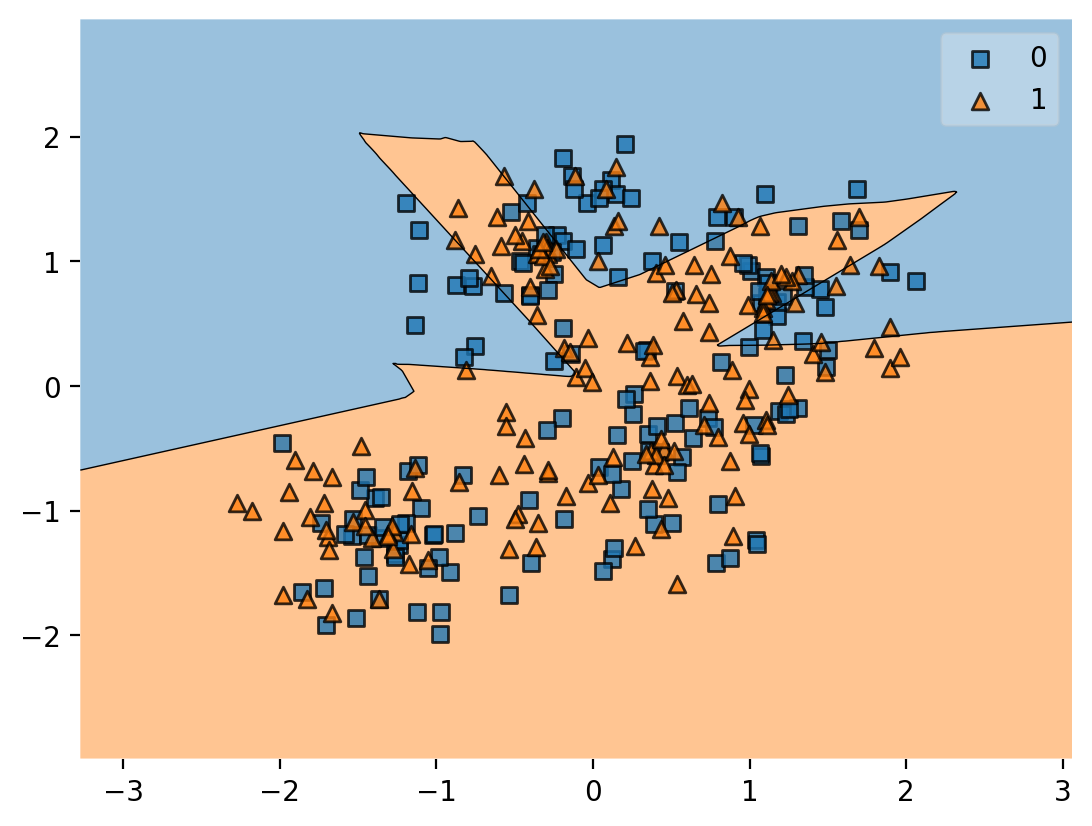

In [25]:
plot_decision_regions(X_train_trans, y_train.values.astype(int), clf = model);

9600/9600 [==============================] - 31s 3ms/step


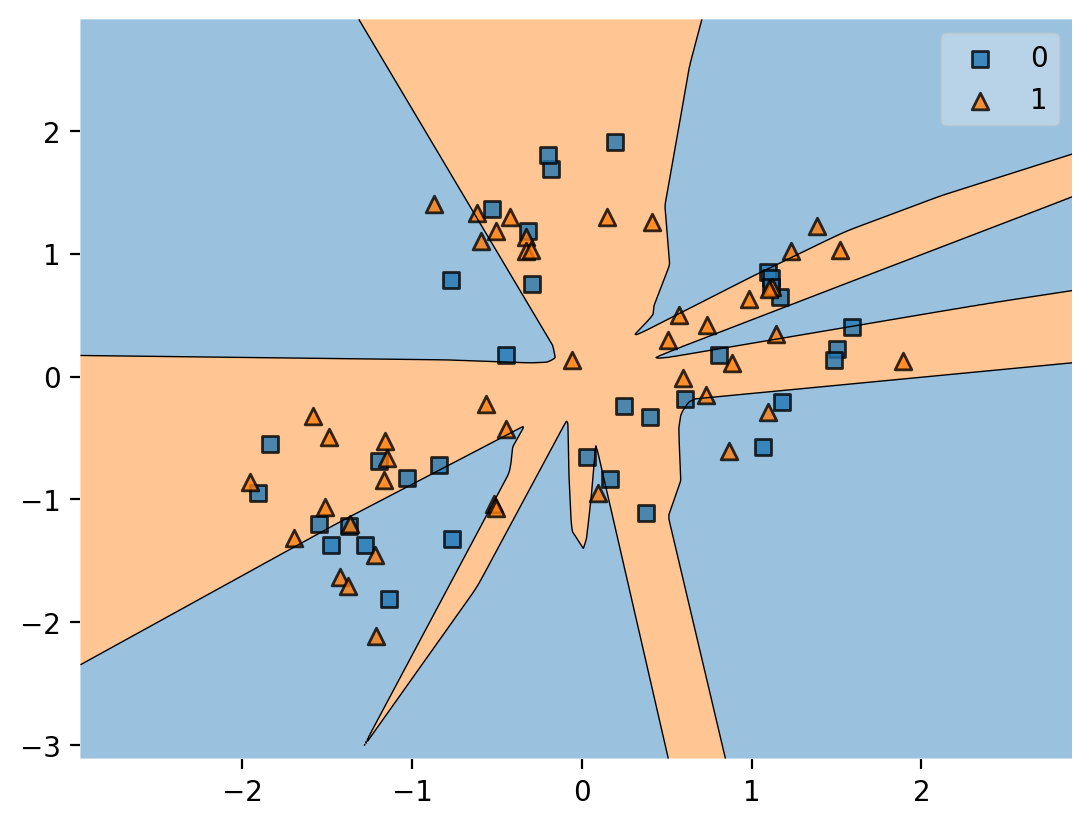

In [53]:
plot_decision_regions(X_test_trans, y_test.values.astype(int), clf = model);

### Accuracy : 57.50%